In [3]:
from netCDF4 import Dataset, MFDataset, num2date
from matplotlib.ticker import LogLocator
from matplotlib.colors import LogNorm
import matplotlib.pylab as plt
import matplotlib
import numpy as np
import numpy.ma as ma
from matplotlib import cm
from mpl_toolkits.basemap import Basemap
import sys
import gc
import datetime
import os
import cmocean
import scipy.io
import xarray as xr

In [4]:
mesh_path='mesh/'
mask = np.load((mesh_path+'mask_AO_cartesian.npy'))
mask1=mask
xx_pol = np.load((mesh_path+'xx_pol.npy'))
yy_pol = np.load((mesh_path+'yy_pol.npy'))
# print("xx_pol.shape")
# print(xx_pol.shape)
# ----boundary of lat&lon for selected areas
left = -180 #longitude 1
right = 180 #longitude 2
bottom = 65 #latitude 1
top = 90 #latitude 2
region = (yy_pol>=bottom)&(yy_pol<=top)&(xx_pol>=left)&(xx_pol<=right)
mask[~region]=True

mask1 = np.load((mesh_path+'mask_AO_cartesian.npy'))
mask1[~region]=True
region_1 = (yy_pol>=65)&(yy_pol<=80)&(xx_pol>=-100)&(xx_pol<=-45)
region_2 = (yy_pol>=65)&(yy_pol<=77)&(xx_pol>=-45)&(xx_pol<=20)
mask1[region_1]=True
mask1[region_2]=True

In [5]:
import scipy.io as sio  
sio.whosmat('fig2_refined_u100km_v100km_390m.mat'),sio.whosmat('fig2_u_v_70m.mat')


([('u_fn', (5000, 5002), 'double')],
 [('u_fn_0', (5002, 5000), 'double'), ('v_fn_0', (5002, 5000), 'double')])

(5000,)


findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.


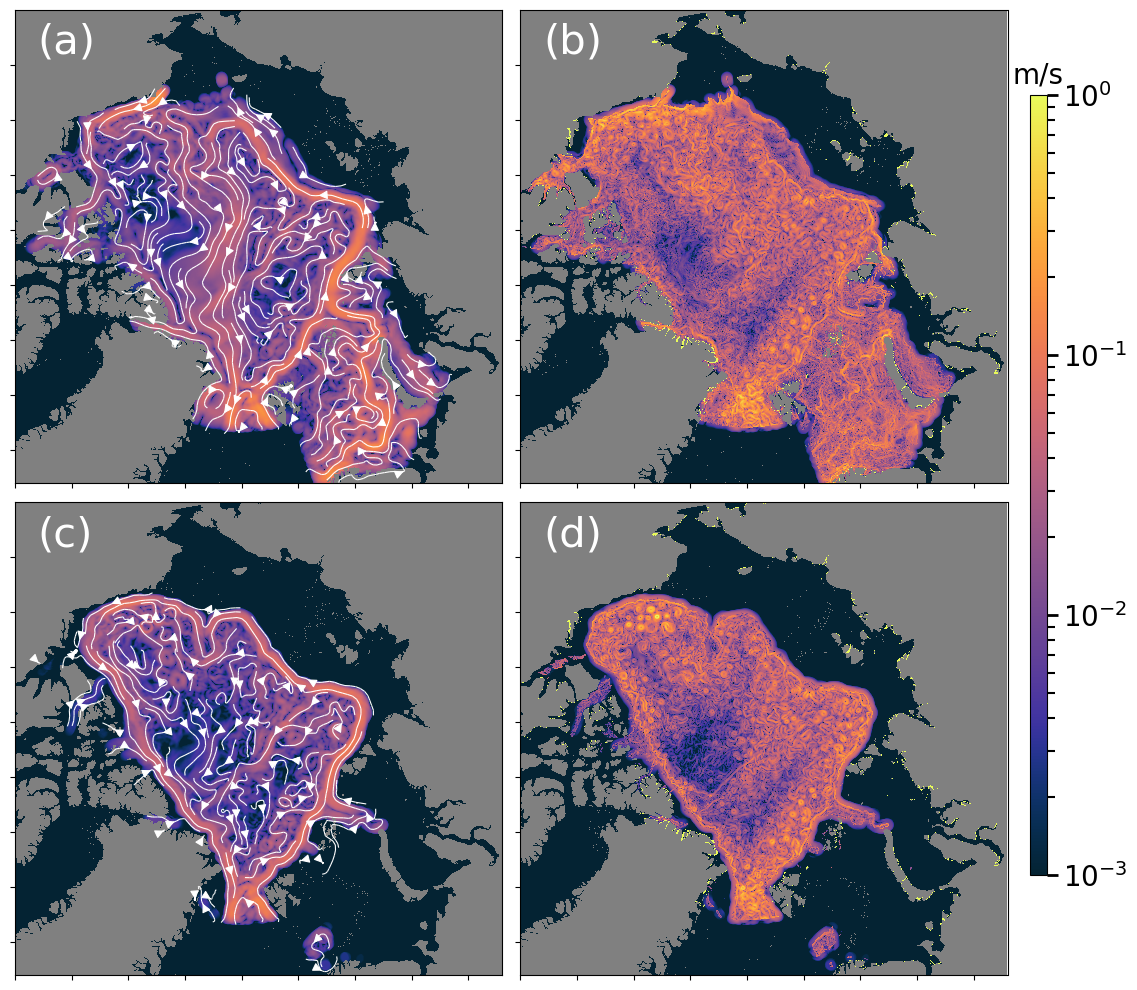

1


In [7]:
data1 = scipy.io.loadmat('fig2_lon_lat_for_streamplot.mat') # load data from .mat
# del lon,lat
lon=data1['lon'][0,0:5000]
lat=data1['lat'][0,0:5000]
print(lat.shape)

data2 = scipy.io.loadmat('fig2_x_y_streamline.mat') # load data from .mat
x=data2['x']
y=data2['y']
 
    
i = 0
date_str=[2015]
for year in range(2015,2016):
    tsteps=1#4 #1 
    # plot loop
    for sstep in range(tsteps):
        data3 = scipy.io.loadmat('fig2_u_v_70m.mat') # load data from .mat
        u_fn_0=data3['u_fn_0']
        v_fn_0=data3['v_fn_0']
        data3 = scipy.io.loadmat('fig2_u_v_390m.mat') # load data from .mat
        u_fn_0_390m=data3['u_fn_0']
        v_fn_0_390m=data3['v_fn_0']

        #### ---70m ---
        data4 = scipy.io.loadmat('fig2_coarsened_u100km_v100km_70m.mat') # load data from .mat
        u_fn_1_70m=data4['u_fn_1']
        v_fn_1_70m=data4['v_fn_1']
        u_fn_70m = u_fn_0.T - u_fn_1_70m
        v_fn_70m = v_fn_0.T - v_fn_1_70m
        
        speed_fn_0 = np.hypot(u_fn_70m, v_fn_70m)
        speed_fn_1 = speed_fn_0.T
        speed_fn_1[mask] = np.nan
        refine_speed_fn_70m = ma.masked_invalid(speed_fn_1)

        speed_fn_0 = np.hypot(u_fn_1_70m, v_fn_1_70m)
        speed_fn_1 = speed_fn_0.T
        speed_fn_1[mask] = np.nan
        coarse_speed_fn_70m = ma.masked_invalid(speed_fn_1)
        
        data5 = scipy.io.loadmat('fig2_coarsened_u100km_v100km_390m.mat') # load data from .mat
        u_fn_1_390m=data5['u_fn_1']
        v_fn_1_390m=data5['v_fn_1']
        u_fn_390m = u_fn_0_390m.T - u_fn_1_390m
        v_fn_390m = v_fn_0_390m.T - v_fn_1_390m
   
        speed_fn_0 = np.hypot(u_fn_390m, v_fn_390m)
        speed_fn_1 = speed_fn_0.T
        speed_fn_1[mask] = np.nan
        refine_speed_fn_390m = ma.masked_invalid(speed_fn_1)

        speed_fn_0 = np.hypot(u_fn_1_390m, v_fn_1_390m)
        speed_fn_1 = speed_fn_0.T
        speed_fn_1[mask] = np.nan
        coarse_speed_fn_390m = ma.masked_invalid(speed_fn_1)
        
        
        ##### ------ ready to plot ------
        fig = plt.figure(figsize=(12.5*0.9,10))
        ################### plot 1, 70m ##########################

        ax = fig.add_subplot(2,2,2)
         
        levels = np.linspace(-1,2,30)
 
        #cmap_b = cmocean.cm.balance
        cmap_b = cmocean.cm.thermal
        cmap_b.set_bad('gray',1)
        #cmap_b = cmocean.cm.amp
        cmap_b_mask = cmocean.cm.gray
        fcolor='gray' #'w'
        lcolor='gray'
        norm_L = matplotlib.colors.LogNorm(vmin=1e-3,vmax=1e0)
        csf1 = ax.pcolormesh(x[500:5000-200,700:], y[500:5000-200,700:], refine_speed_fn_70m[500:5000-200,700:],cmap=cmap_b,norm=norm_L)
#         pdate = sdate + delta*sstep
        #plt.text(3e6, -8.92e6,'{}-{}'.format(pdate.year, str(sstep).zfill(4)),fontsize=20, color='b');
        ax.tick_params(labelbottom=False)
        ax.tick_params(labelleft=False)
        plt.text(x[200+500,0], y[0,5000-400], "(b)", fontsize=30, color='w')
        
        ################### plot 2, 70m ##########################
        #fig, axs = plt.subplots(1,2,2,figsize=(15,10))
        ax = fig.add_subplot(2,2,1)
        levels = np.linspace(-1,2,30)
 
        #cmap_b = cmocean.cm.balance
        cmap_b = cmocean.cm.thermal
        cmap_b.set_bad('gray',1)
        #cmap_b = cmocean.cm.amp
        cmap_b_mask = cmocean.cm.gray
        fcolor='gray' #'w'
        lcolor='gray'
         
        norm_L = matplotlib.colors.LogNorm(vmin=1e-3,vmax=1e0)
        csf2 = ax.pcolormesh(x[500:5000-200,700:], y[500:5000-200,700:], coarse_speed_fn_70m[500:5000-200,700:],cmap=cmap_b,norm=norm_L)
        speed = np.sqrt(u_fn_1_70m**2 + v_fn_1_70m**2)
        lw = 5*speed / speed.max()
        csp = ax.streamplot(lon[700:5000],lat[700:5000],u_fn_1_70m[700:5000,700:5000], v_fn_1_70m[700:5000,700:5000], density=3,color="w",integration_direction='forward',linewidth=0.8,arrowsize=1.3, arrowstyle='-|>')
        ax.tick_params(labelbottom=False)
        ax.tick_params(labelleft=False)
        plt.text(x[200+500,0], y[0,5000-400], "(a)", fontsize=30, color='w')

 
        ################### plot 3, 400m ##########################

        ax = fig.add_subplot(2,2,4)         
        levels = np.linspace(-1,2,30)
        #cmap_b = cmocean.cm.balance
        cmap_b = cmocean.cm.thermal
        cmap_b.set_bad('gray',1)
        #cmap_b = cmocean.cm.amp
        cmap_b_mask = cmocean.cm.gray
        fcolor='gray' #'w'
        lcolor='gray'
        norm_L = matplotlib.colors.LogNorm(vmin=1e-3,vmax=1e0)
        csf1 = ax.pcolormesh(x[500:5000-200,700:], y[500:5000-200,700:], refine_speed_fn_390m[500:5000-200,700:],cmap=cmap_b,norm=norm_L)
        ax.tick_params(labelbottom=False)
        ax.tick_params(labelleft=False)
        plt.text(x[200+500,0], y[0,5000-400], "(d)", fontsize=30, color='w')
        
        ################### plot 4, 400m ##########################
        #fig, axs = plt.subplots(1,2,2,figsize=(15,10))
        ax = fig.add_subplot(2,2,3)
        levels = np.linspace(-1,2,30)
 
        #cmap_b = cmocean.cm.balance
        cmap_b = cmocean.cm.thermal
        cmap_b.set_bad('gray',1)
        #cmap_b = cmocean.cm.amp
        cmap_b_mask = cmocean.cm.gray
        fcolor='gray' #'w'
        lcolor='gray'
         
        norm_L = matplotlib.colors.LogNorm(vmin=1e-3,vmax=1e0)
        csf2 = ax.pcolormesh(x[500:5000-200,700:], y[500:5000-200,700:], coarse_speed_fn_390m[500:5000-200,700:],cmap=cmap_b,norm=norm_L)
        csp = ax.streamplot(lon[700:5000],lat[700:5000],u_fn_1_390m[700:5000,700:5000], v_fn_1_390m[700:5000,700:5000], density=3,color="w",integration_direction='forward',linewidth=0.8,arrowsize=1.3, arrowstyle='-|>')
        ax.tick_params(labelbottom=False)
        ax.tick_params(labelleft=False)
        plt.text(x[200+500,0], y[0,5000-400], "(c)", fontsize=30, color='w')


        plt.tight_layout()
# plt.subplots_adjust(left=None, bottom=None, right=None, top=None, \
#     wspace=None, hspace=0.45)
        fig.subplots_adjust(right=0.9, wspace=None, hspace=None)
        position = fig.add_axes([0.92, 0.12, 0.015, .78 ])# [left bottom right up]
        cb = fig.colorbar(csf2, cax=position)
        #set ticks for colorbar
        colorbarfontdict = {"size":20,"color":"k",'family':'Times New Roman'}
        cb.ax.set_title('m/s',fontdict=colorbarfontdict,pad=8)
        cb.ax.tick_params(labelsize=20,direction='out',length=8,width=2)
        cb.ax.minorticks_on()
        cb.ax.tick_params(which='minor',labelsize=20,direction='out',length=6,width=1.5)
        i = i+1
        
        plt.show()
        # memory cleanup, otherwise you will occupy it all very soon
        plt.clf()
        plt.close()
        gc.collect()
        print(i)